# **Introdução ao Pandas**

In [93]:
# Importando o Pandas
import pandas as pd
from pandas import DataFrame
import numpy as np
import sklearn
from sklearn.datasets import load_iris

### **Manipulando os dados em DataFrames**

In [94]:
# Cria o dicionário com os dados
dados = {
    'Estado': ['Santa Catarina', 'Ceará', 'Goiás', 'Bahia', 'Minas Gerais'],
    'Ano': [2004, 2005, 2006, 2007, 2008],
    'Taxa de Desemprego': [1.5, 1.7, 1.6, 2.4, 2.7]
}

In [95]:
# Converte o dicionário em um DataFrame
df = DataFrame(dados)

In [96]:
df.head()   # Exibe as primeiras 5 linhas do DataFrame

,Estado,Ano,Taxa de Desemprego
0,Santa Catarina,2004,1.5
1,Ceará,2005,1.7
2,Goiás,2006,1.6
3,Bahia,2007,2.4
4,Minas Gerais,2008,2.7


In [97]:
type(df)    # Exibe o tipo do objeto

pandas.core.frame.DataFrame

In [98]:
# Reorganizando as colunas
DataFrame(dados, columns=['Estado', 'Taxa de Desemprego', 'Ano'])

,Estado,Taxa de Desemprego,Ano
0,Santa Catarina,1.5,2004
1,Ceará,1.7,2005
2,Goiás,1.6,2006
3,Bahia,2.4,2007
4,Minas Gerais,2.7,2008


In [99]:
# Criando outro DataFrame com os mesmos dados, mas com índices personalizados
df2 = DataFrame(dados, columns=['Estado', 'Taxa de Desemprego', 'Taxa Crescimento', 'Ano'], index=['estado1', 'estado2', 'estado3', 'estado4', 'estado5'])
df2

,Estado,Taxa de Desemprego,Taxa Crescimento,Ano
estado1,Santa Catarina,1.5,NaN,2004
estado2,Ceará,1.7,NaN,2005
estado3,Goiás,1.6,NaN,2006
estado4,Bahia,2.4,NaN,2007
estado5,Minas Gerais,2.7,NaN,2008


In [100]:
df2.values  # Exibe os valores do DataFrame

array([['Santa Catarina', 1.5, nan, 2004],
       ['Ceará', 1.7, nan, 2005],
       ['Goiás', 1.6, nan, 2006],
       ['Bahia', 2.4, nan, 2007],
       ['Minas Gerais', 2.7, nan, 2008]], dtype=object)

In [101]:
df2.dtypes  # Exibe os tipos de dados do DataFrame

Estado                 object
Taxa de Desemprego    float64
Taxa Crescimento       object
Ano                     int64
dtype: object

In [102]:
df2.columns # Exibe os nomes das colunas

Index(['Estado', 'Taxa de Desemprego', 'Taxa Crescimento', 'Ano'], dtype='object')

In [103]:
df2['Estado']   # Exibe os valores da coluna 'Estado'

estado1    Santa Catarina
estado2             Ceará
estado3             Goiás
estado4             Bahia
estado5      Minas Gerais
Name: Estado, dtype: object

In [104]:
df2.filter(items=['estado2'], axis=0)    # Filtra os valores da linha 'estado2'

,Estado,Taxa de Desemprego,Taxa Crescimento,Ano
estado2,Ceará,1.7,NaN,2005


### **NumPy e Pandas para Manipulação de dados**

In [105]:
df2.describe()  # Exibe um resumo estatístico do DataFrame

,Taxa de Desemprego,Ano
count,5.000000,5.000000
mean,1.980000,2006.000000
std,0.535724,1.581139
min,1.500000,2004.000000
25%,1.600000,2005.000000
50%,1.700000,2006.000000
75%,2.400000,2007.000000
max,2.700000,2008.000000


In [106]:
df2.isna()  # Verifica se há valores nulos no DataFrame

,Estado,Taxa de Desemprego,Taxa Crescimento,Ano
estado1,False,False,True,False
estado2,False,False,True,False
estado3,False,False,True,False
estado4,False,False,True,False
estado5,False,False,True,False


In [107]:
df2['Taxa Crescimento'].isna()  # Verifica se há valores nulos na coluna 'Taxa Crescimento'

estado1    True
estado2    True
estado3    True
estado4    True
estado5    True
Name: Taxa Crescimento, dtype: bool

In [108]:
# Usa o NumPy para atribuir valores a coluna 'Taxa Crescimento'
df2['Taxa Crescimento'] = np.arange(5.)
df2

,Estado,Taxa de Desemprego,Taxa Crescimento,Ano
estado1,Santa Catarina,1.5,0.0,2004
estado2,Ceará,1.7,1.0,2005
estado3,Goiás,1.6,2.0,2006
estado4,Bahia,2.4,3.0,2007
estado5,Minas Gerais,2.7,4.0,2008


In [109]:
df2.describe()

,Taxa de Desemprego,Taxa Crescimento,Ano
count,5.000000,5.000000,5.000000
mean,1.980000,2.000000,2006.000000
std,0.535724,1.581139,1.581139
min,1.500000,0.000000,2004.000000
25%,1.600000,1.000000,2005.000000
50%,1.700000,2.000000,2006.000000
75%,2.400000,3.000000,2007.000000
max,2.700000,4.000000,2008.000000


### **Slicing de DataFrame**

In [110]:
df2['estado2':'estado4']    # Exibe as linhas entre 'estado2' e 'estado4'

,Estado,Taxa de Desemprego,Taxa Crescimento,Ano
estado2,Ceará,1.7,1.0,2005
estado3,Goiás,1.6,2.0,2006
estado4,Bahia,2.4,3.0,2007


In [111]:
df2[df2['Taxa de Desemprego'] < 2]

,Estado,Taxa de Desemprego,Taxa Crescimento,Ano
estado1,Santa Catarina,1.5,0.0,2004
estado2,Ceará,1.7,1.0,2005
estado3,Goiás,1.6,2.0,2006


In [112]:
df2[['Estado', 'Taxa Crescimento']]  # Exibe as colunas 'Estado' e 'Taxa Crescimento'

,Estado,Taxa Crescimento
estado1,Santa Catarina,0.0
estado2,Ceará,1.0
estado3,Goiás,2.0
estado4,Bahia,3.0
estado5,Minas Gerais,4.0


### **Preechendo valores ausentes**

In [113]:
dataset_df = pd.read_csv('pedidos.csv')

In [114]:
dataset_df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,NaN
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,NaN
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0


In [115]:
dataset_df.isna().sum() # Verifica a quantidade de valores nulos no DataFrame

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Regiao          0
ID_Produto      0
Categoria       0
Nome_Produto    0
Valor_Venda     0
Quantidade      2
dtype: int64

In [116]:
# Extrair a moda da coluna 'Quantidade'
moda = dataset_df['Quantidade'].value_counts().index[0]
moda

np.float64(3.0)

In [117]:
# Preencher os valores nulos da coluna 'Quantidade' com a moda
dataset_df['Quantidade'].fillna(value=moda, inplace=True)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_7568\3715320012.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_df['Quantidade'].fillna(value=moda, inplace=True)


In [118]:
dataset_df.isna().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Regiao          0
ID_Produto      0
Categoria       0
Nome_Produto    0
Valor_Venda     0
Quantidade      0
dtype: int64

### **Consulta de dados no DataFrame**

In [119]:
dataset_df.Valor_Venda.describe()   # Exibe um resumo estatístico da coluna 'Valor_Venda'

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Valor_Venda, dtype: float64

In [120]:
df3 = dataset_df.query('229 < Valor_Venda < 10000')    # Filtra os valores da coluna 'Valor_Venda' entre 229 e 10000

In [121]:
df3.Valor_Venda.describe()

count    2357.000000
mean      766.679142
std       856.315136
min       229.544000
25%       323.100000
50%       490.320000
75%       859.200000
max      9892.740000
Name: Valor_Venda, dtype: float64

In [122]:
# Gera um novo DataFrame com valores acima da média
df4 = df3.query('Valor_Venda > Valor_Venda.mean()')

In [123]:
df4.Valor_Venda.describe()

count     687.000000
mean     1615.597817
std      1203.403998
min       767.214000
25%       914.200000
50%      1212.960000
75%      1763.575000
max      9892.740000
Name: Valor_Venda, dtype: float64

### **Verificando a ocorrência de diversos valores**

In [124]:
dataset_df.shape    # Exibe a quantidade de linhas e colunas do DataFrame

(9994, 11)

In [125]:
# Filtra os valores da coluna 'Quantidade' que são 5, 7, 9 ou 11
dataset_df[dataset_df['Quantidade'].isin([5, 7, 9, 11])]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
5,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-FU-10001487,Furniture,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0
9,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,OFF-AP-10002892,Office Supplies,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5.0
10,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-TA-10001539,Furniture,Chromcraft Rectangular Conference Tables,1706.1840,9.0
14,US-2015-118983,2015-11-22,HP-14815,Home Office,United States,Central,OFF-AP-10002311,Office Supplies,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5.0
...,...,...,...,...,...,...,...,...,...,...,...
9974,US-2016-103674,2016-12-06,AP-10720,Home Office,United States,West,OFF-AR-10004752,Office Supplies,Blackstonian Pencils,18.6900,7.0
9977,US-2016-103674,2016-12-06,AP-10720,Home Office,United States,West,OFF-FA-10003467,Office Supplies,"Alliance Big Bands Rubber Bands, 12/Pack",13.8600,7.0
9981,CA-2017-163566,2017-08-03,TB-21055,Consumer,United States,East,OFF-LA-10004484,Office Supplies,Avery 476,16.5200,5.0
9982,US-2016-157728,2016-09-22,RC-19960,Consumer,United States,Central,OFF-PA-10002195,Office Supplies,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.5600,7.0


In [126]:
dataset_df[dataset_df['Quantidade'].isin([5, 7, 9, 11])].shape

(2128, 11)

In [127]:
dataset_df[dataset_df['Quantidade'].isin([5, 7, 9, 11])][:10]   # Exibe as 10 primeiras linhas do DataFrame

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
5,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-FU-10001487,Furniture,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0
9,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,OFF-AP-10002892,Office Supplies,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5.0
10,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-TA-10001539,Furniture,Chromcraft Rectangular Conference Tables,1706.1840,9.0
14,US-2015-118983,2015-11-22,HP-14815,Home Office,United States,Central,OFF-AP-10002311,Office Supplies,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5.0
21,CA-2016-137330,2016-12-09,KB-16585,Corporate,United States,Central,OFF-AR-10000246,Office Supplies,Newell 318,19.4600,7.0
22,CA-2016-137330,2016-12-09,KB-16585,Corporate,United States,Central,OFF-AP-10001492,Office Supplies,"Acco Six-Outlet Power Strip, 4' Cord Length",60.3400,7.0
27,US-2015-150630,2015-09-17,TB-21520,Consumer,United States,East,FUR-BO-10004834,Furniture,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7.0
35,CA-2016-117590,2016-12-08,GH-14485,Corporate,United States,Central,TEC-PH-10004977,Technology,GE 30524EE4,1097.5440,7.0
36,CA-2016-117590,2016-12-08,GH-14485,Corporate,United States,Central,FUR-FU-10003664,Furniture,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5.0


### **Operadores Lógicos para Manipulação**

In [128]:
# Filtra os valores da coluna 'Segmento' que são 'Home Office' e da coluna 'Regiao' que são 'South'
dataset_df[ (dataset_df.Segmento == 'Home Office') & (dataset_df.Regiao == 'South') ].head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
182,CA-2014-158274,2014-11-19,RM-19675,Home Office,United States,South,TEC-PH-10003273,Technology,AT&T TR1909W,503.9600,4.0
183,CA-2014-158274,2014-11-19,RM-19675,Home Office,United States,South,TEC-PH-10004896,Technology,Nokia Lumia 521 (T-Mobile),149.9500,5.0
184,CA-2014-158274,2014-11-19,RM-19675,Home Office,United States,South,TEC-AC-10002345,Technology,HP Standard 104 key PS/2 Keyboard,29.0000,2.0
231,US-2017-100930,2017-04-07,CS-12400,Home Office,United States,South,FUR-TA-10001705,Furniture,Bush Advantage Collection Round Conference Table,233.8600,2.0
232,US-2017-100930,2017-04-07,CS-12400,Home Office,United States,South,FUR-TA-10003473,Furniture,Bretford Rectangular Conference Table Tops,620.6145,3.0


In [129]:
# Filtra os valores da coluna 'Segmento' que são 'Home Office' ou da coluna 'Regiao' que são 'South'
dataset_df[ (dataset_df.Segmento == 'Home Office') | (dataset_df.Regiao == 'South') ].tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
9979,US-2016-103674,2016-12-06,AP-10720,Home Office,United States,West,OFF-BI-10002026,Office Supplies,Ibico Recycled Linen-Style Covers,437.472,14.0
9980,US-2015-151435,2015-09-06,SW-20455,Consumer,United States,South,FUR-TA-10001029,Furniture,KI Adjustable-Height Table,85.980,1.0
9987,CA-2017-163629,2017-11-17,RA-19885,Corporate,United States,South,TEC-AC-10001539,Technology,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1.0
9988,CA-2017-163629,2017-11-17,RA-19885,Corporate,United States,South,TEC-PH-10004006,Technology,Panasonic KX - TS880B Telephone,206.100,5.0
9989,CA-2014-110422,2014-01-21,TB-21400,Consumer,United States,South,FUR-FU-10001889,Furniture,Ultra Door Pull Handle,25.248,3.0


In [130]:
# Exibe 5 linhas aleatórias do DataFrame
dataset_df[ (dataset_df.Segmento != 'Home Office') & (dataset_df.Regiao != 'South') ].sample(5)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
7365,CA-2016-127243,2016-11-28,DS-13180,Corporate,United States,East,OFF-BI-10003166,Office Supplies,GBC Plasticlear Binding Covers,6.888,2.0
5443,CA-2015-148712,2015-04-17,JM-15535,Consumer,United States,East,OFF-BI-10001900,Office Supplies,"DXL Angle-View Binders with Locking Rings, Black",62.296,13.0
3667,CA-2014-129364,2014-12-08,TB-21250,Consumer,United States,West,OFF-SU-10000432,Office Supplies,Acco Side-Punched Conventional Columnar Pads,13.880,5.0
1548,CA-2015-111395,2015-11-23,VB-21745,Corporate,United States,Central,OFF-ST-10001291,Office Supplies,Tenex Personal Self-Stacking Standard File Box...,27.056,2.0
8455,CA-2016-154081,2016-05-22,JE-15610,Corporate,United States,West,TEC-PH-10001918,Technology,Nortel Business Series Terminal T7208 Digital ...,222.384,2.0


### **Agrupamento de Dados (Group By)**

In [131]:
# Agrupa os valores da coluna 'Valor_Venda' por 'Segmento' e 'Regiao'
dataset_df[['Segmento', 'Regiao', 'Valor_Venda']].groupby(['Segmento', 'Regiao']).mean()

Valor_Venda
Segmento    Regiao              
Consumer    Central   207.946728
            East      238.875539
            South     233.390180
            West      217.033955
Corporate   Central   234.763466
            East      228.516929
            South     238.992025
            West      235.265911
Home Office Central   208.248046
            East      253.911805
            South     272.996329
            West      239.442692

**Agregação Múltipla**

In [132]:
# Exibe a média, desvio padrão e contagem dos valores agrupados
dataset_df[['Segmento', 'Regiao', 'Valor_Venda']].groupby(['Segmento', 'Regiao']).agg(['mean', 'std', 'count'])

Valor_Venda                   
                           mean          std count
Segmento    Regiao                                
Consumer    Central  207.946728   587.906523  1212
            East     238.875539   633.371169  1469
            South    233.390180   559.346824   838
            West     217.033955   551.997547  1672
Corporate   Central  234.763466   818.947521   673
            East     228.516929   530.001654   877
            South    238.992025   586.176947   510
            West     235.265911   471.288764   960
Home Office Central  208.248046   371.009180   438
            East     253.911805   722.777318   502
            South    272.996329  1404.798466   272
            West     239.442692   529.242737   571

### **Manipuilação de String em DataFrame**

**Filtrando DataFrame com Strings**

In [133]:
# Filtra os valores da coluna 'Segmento' que começam com 'Con'
dataset_df[dataset_df.Segmento.str.startswith('Con')].head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0
5,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-FU-10001487,Furniture,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0


In [134]:
dataset_df[dataset_df.Segmento.str.endswith('ate')].head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.620,2.0
21,CA-2016-137330,2016-12-09,KB-16585,Corporate,United States,Central,OFF-AR-10000246,Office Supplies,Newell 318,19.460,7.0
22,CA-2016-137330,2016-12-09,KB-16585,Corporate,United States,Central,OFF-AP-10001492,Office Supplies,"Acco Six-Outlet Power Strip, 4' Cord Length",60.340,7.0
35,CA-2016-117590,2016-12-08,GH-14485,Corporate,United States,Central,TEC-PH-10004977,Technology,GE 30524EE4,1097.544,7.0
36,CA-2016-117590,2016-12-08,GH-14485,Corporate,United States,Central,FUR-FU-10003664,Furniture,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.920,5.0


**Split de String**

In [135]:
dataset_df['ID_Pedido'].head()

0    CA-2016-152156
1    CA-2016-152156
2    CA-2016-138688
3    US-2015-108966
4    US-2015-108966
Name: ID_Pedido, dtype: object

In [136]:
# Divide a coluna 'ID_Pedido'
dataset_df['ID_Pedido'].str.split('-')

0       [CA, 2016, 152156]
1       [CA, 2016, 152156]
2       [CA, 2016, 138688]
3       [US, 2015, 108966]
4       [US, 2015, 108966]
               ...        
9989    [CA, 2014, 110422]
9990    [CA, 2017, 121258]
9991    [CA, 2017, 121258]
9992    [CA, 2017, 121258]
9993    [CA, 2017, 119914]
Name: ID_Pedido, Length: 9994, dtype: object

In [137]:
# Separa o ano do ID do Pedido
dataset_df['ID_Pedido'].str.split('-').str[1].head()

0    2016
1    2016
2    2016
3    2015
4    2015
Name: ID_Pedido, dtype: object

In [138]:
# Cria a coluna 'Ano' com o ano do ID do Pedido
dataset_df['Ano'] = dataset_df['ID_Pedido'].str.split('-').str[1]

In [139]:
dataset_df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade,Ano
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0,2016
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,2016
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,2016
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,2015
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0,2015


**Strip de Strings**

In [140]:
dataset_df['Data_Pedido'].head(3)

0    2016-11-08
1    2016-11-08
2    2016-06-12
Name: Data_Pedido, dtype: object

In [141]:
# Remove o '20' do início da string
# lstrip() remove os caracteres à esquerda da string
dataset_df['Data_Pedido'].str.lstrip('20').head(3)

0    16-11-08
1    16-11-08
2    16-06-12
Name: Data_Pedido, dtype: object

**Replace de Strings**

In [142]:
# Substitui 'CG' por 'AX' na coluna 'ID_Cliente'
dataset_df['ID_Cliente'] = dataset_df['ID_Cliente'].str.replace('CG', 'AX')

In [143]:
dataset_df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade,Ano
0,CA-2016-152156,2016-11-08,AX-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0,2016
1,CA-2016-152156,2016-11-08,AX-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,2016
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,2016
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,2015
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0,2015


**Combinação de Strings**

In [144]:
# Concatena as colunas 'ID_Pedido' e 'Segmento'
dataset_df['Pedido_Segmento'] = dataset_df['ID_Pedido'].str.cat(dataset_df['Segmento'], sep='-')

In [145]:
dataset_df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade,Ano,Pedido_Segmento
0,CA-2016-152156,2016-11-08,AX-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0,2016,CA-2016-152156-Consumer
1,CA-2016-152156,2016-11-08,AX-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,2016,CA-2016-152156-Consumer
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,2016,CA-2016-138688-Corporate
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,2015,US-2015-108966-Consumer
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0,2015,US-2015-108966-Consumer


### **Construção de Gráficos com DataFrames**

In [146]:
data = load_iris()  # Carrega o dataset Iris

In [147]:
iris_df = pd.DataFrame(data.data, columns=data.feature_names)   # Converte os dados em um DataFrame
iris_df['species'] = data.target    # Adiciona a coluna 'species' ao DataFrame
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: >

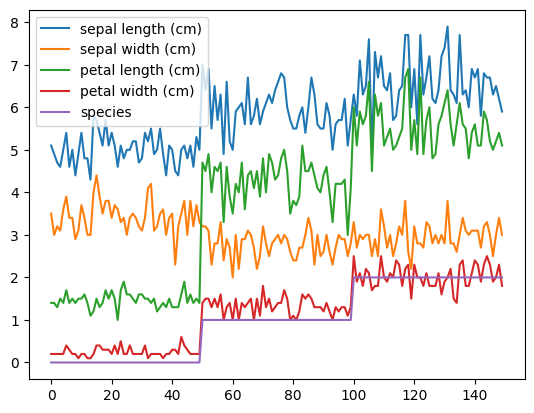

In [148]:
iris_df.plot()  # Cria um gráfico com o DataFrame

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

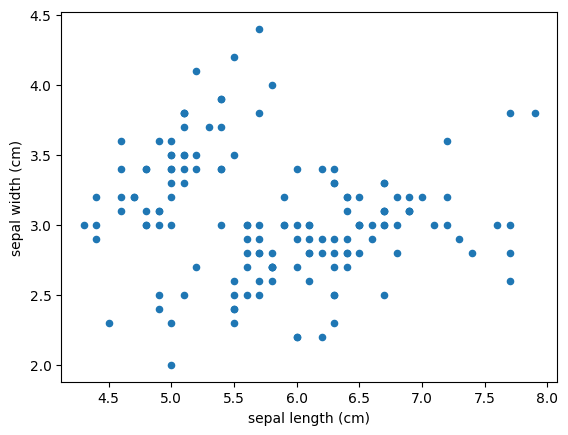

In [149]:
iris_df.plot.scatter(x='sepal length (cm)', y='sepal width (cm)')    # Cria um gráfico de dispersão

<Axes: >

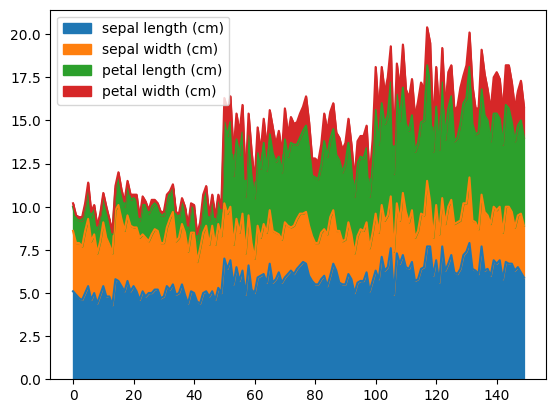

In [150]:
columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris_df[columns].plot.area()  # Cria um gráfico de área

<Axes: xlabel='species'>

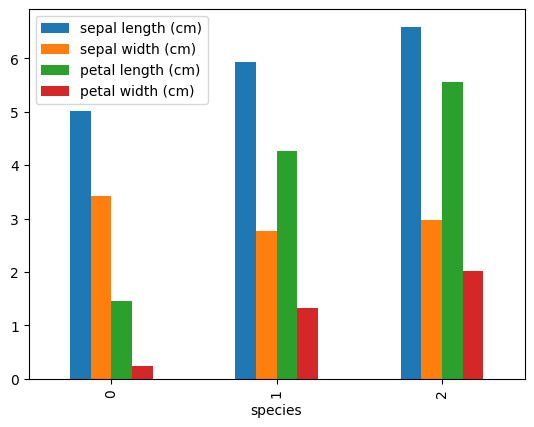

In [151]:
# Cria um gráfico de barras com a média dos valores agrupados por 'species'
iris_df.groupby('species').mean().plot.bar()

<Axes: ylabel='sepal length (cm)'>

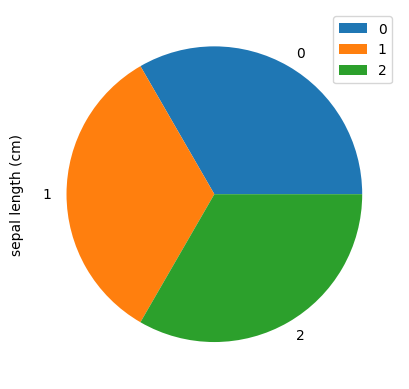

In [152]:
# Cria um gráfico de pizza com a contagem dos valores agrupados por 'species'
iris_df.groupby('species').count().plot.pie(y = 'sepal length (cm)')

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>], dtype=object)

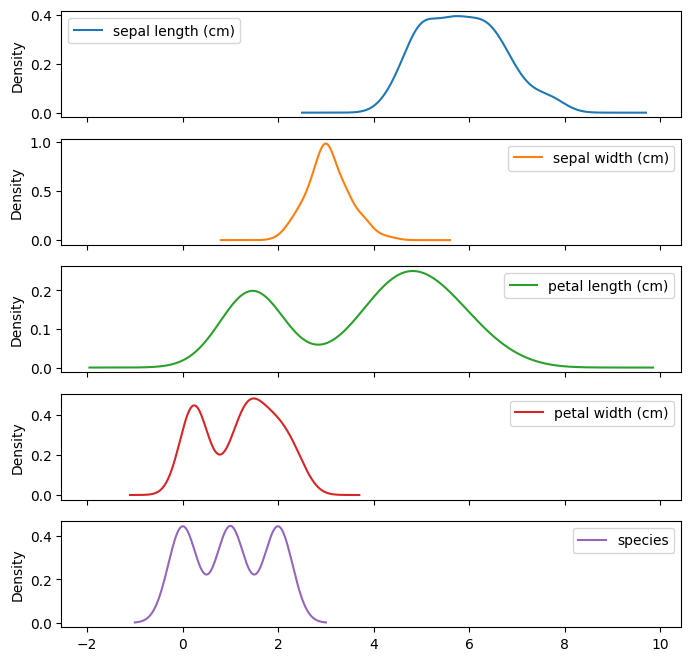

In [153]:
# Gráfico KDE (Kernel Density Estimate) para cada variável
iris_df.plot.kde(subplots=True, figsize=(8, 8))

<Axes: >

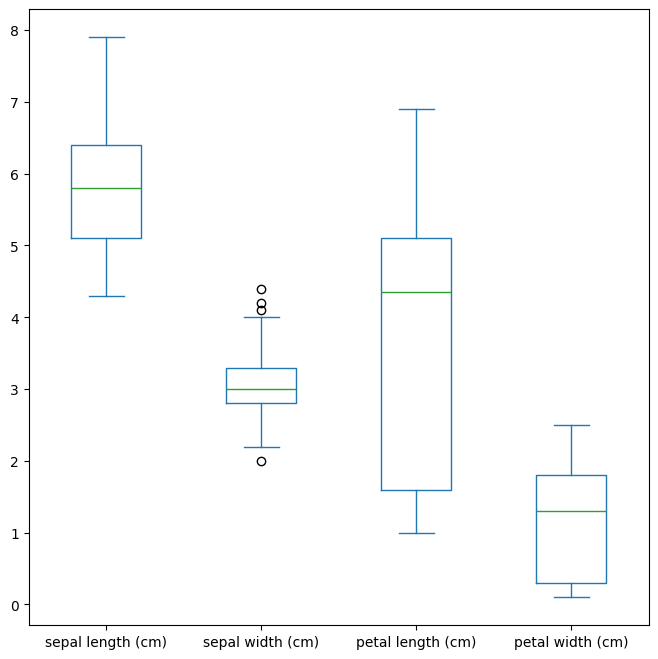

In [154]:
columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris_df[columns].plot.box(figsize = (8, 8))   # Cria um boxplot